In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.runComparison as rc

In [32]:
rootdir = '/Users/lynnej/otherRepos/survey_strategy/db'
runlist = ['minion_1016_oldsky', 'minion_1016_newsky', 'astro-lsst-01_2020', 
           'astro-lsst-01_2021', 'astro-lsst-01_2022']
colors = {'minion_1016_oldsky': 'r', 'minion_1016_newsky': 'm', 
         'astro-lsst-01_2020': 'c', 'astro-lsst-01_2021': 'b', 'astro-lsst-01_2022': 'k'}

In [4]:
comp = rc.RunComparison(baseDir=rootdir, runlist=runlist)

In [5]:
# Check which analysis results are available.
for r in comp.runlist:
    print(r, comp.runresults[r].keys())

minion_1016_oldsky dict_keys(['sci', 'all', 'sched', 'srd'])
minion_1016_newsky dict_keys(['sci', 'all', 'sched', 'srd'])
astro-lsst-01_2020 dict_keys(['sci', 'all', 'sched', 'srd'])
astro-lsst-01_2021 dict_keys(['all', 'srd'])
astro-lsst-01_2022 dict_keys(['all', 'srd'])


In [6]:
srd = comp.buildMetricDict('srd')

In [7]:
comp.addSummaryStats(srd)

In [8]:
comp.summaryStats

,fOArea: Nvisits (#) fO All visits HealpixSlicer,fOArea: Nvisits/benchmark fO All visits HealpixSlicer,fONv: Area (sqdeg) fO All visits HealpixSlicer,fONv: Area/benchmark fO All visits HealpixSlicer,Max Parallax @ 20.0 All visits HealpixSlicer,Mean Parallax @ 20.0 All visits HealpixSlicer,Median Parallax @ 20.0 All visits HealpixSlicer,Min Parallax @ 20.0 All visits HealpixSlicer,N(+3Sigma) Parallax @ 20.0 All visits HealpixSlicer,N(-3Sigma) Parallax @ 20.0 All visits HealpixSlicer,...,Rms RapidRevisitUniformity WFD HealpixSlicer,Area (sq deg) Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Max Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Mean Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Median Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Min Number of revisits faster than 30.0 minutes WFD HealpixSlicer,N(+3Sigma) Number of revisits faster than 30.0 minutes WFD HealpixSlicer,N(-3Sigma) Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Rms Number of revisits faster than 30.0 minutes WFD HealpixSlicer
minion_1016_oldsky,888.0,1.076364,18059.081364,1.003282,2.483739,0.784823,0.616342,0.102157,82.0,0.0,...,0.080691,9160.287697,1881.0,469.573622,321.0,239.0,11.0,0.0,21495.0,296.430102
minion_1016_newsky,888.0,1.076364,18059.081364,1.003282,2.358487,0.758492,0.588512,0.099775,90.0,0.0,...,0.080691,9160.287697,1881.0,469.573622,321.0,239.0,11.0,0.0,21495.0,296.430102
astro-lsst-01_2020,889.0,1.077576,18059.081364,1.003282,1.578735,0.660845,0.539807,0.098632,7.0,0.0,...,0.064807,9162.206886,2105.0,540.570458,391.0,269.0,11.0,0.0,21495.0,315.250957
astro-lsst-01_2021,833.0,1.009697,18056.563483,1.003142,1.904754,0.696521,0.572615,0.084417,19.0,0.0,...,0.129998,8427.157611,1880.0,351.206653,200.0,119.0,11.0,0.0,21495.0,304.060526
astro-lsst-01_2022,836.0,1.013333,18056.563483,1.003142,1.836513,0.693132,0.569722,0.085804,19.0,0.0,...,0.127411,8340.794119,1923.0,345.402838,192.0,114.0,11.0,0.0,21495.0,307.011354


In [9]:
comp.normalizeStats(baselineRun='astro-lsst-01_2020')

In [10]:
df = comp.normalizedStats

In [11]:
cols = []
for i in df.columns:
    if df[i].max() > 0.1:
        cols.append(i)
    if df[i].min() < -0.1: 
        cols.append(i)

In [12]:
comp.summaryStats[cols]

,Max Parallax @ 20.0 All visits HealpixSlicer,Mean Parallax @ 20.0 All visits HealpixSlicer,Median Parallax @ 20.0 All visits HealpixSlicer,Min Parallax @ 20.0 All visits HealpixSlicer,N(+3Sigma) Parallax @ 20.0 All visits HealpixSlicer,Rms Parallax @ 20.0 All visits HealpixSlicer,Max Parallax @ 24.0 All visits HealpixSlicer,Mean Parallax @ 24.0 All visits HealpixSlicer,Median Parallax @ 24.0 All visits HealpixSlicer,Min Parallax @ 24.0 All visits HealpixSlicer,...,Max RapidRevisitUniformity WFD HealpixSlicer,Mean RapidRevisitUniformity WFD HealpixSlicer,Median RapidRevisitUniformity WFD HealpixSlicer,Min RapidRevisitUniformity WFD HealpixSlicer,N(+3Sigma) RapidRevisitUniformity WFD HealpixSlicer,Rms RapidRevisitUniformity WFD HealpixSlicer,Max Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Mean Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Median Number of revisits faster than 30.0 minutes WFD HealpixSlicer,Min Number of revisits faster than 30.0 minutes WFD HealpixSlicer
minion_1016_oldsky,2.483739,0.784823,0.616342,0.102157,82.0,0.393867,75.484387,12.814657,7.852745,1.516128,...,0.475951,0.267228,0.278653,0.052742,0.0,0.080691,1881.0,469.573622,321.0,239.0
minion_1016_newsky,2.358487,0.758492,0.588512,0.099775,90.0,0.390898,69.297413,12.460277,7.798368,1.469977,...,0.475951,0.267228,0.278653,0.052742,0.0,0.080691,1881.0,469.573622,321.0,239.0
astro-lsst-01_2020,1.578735,0.660845,0.539807,0.098632,7.0,0.294740,38.262465,7.823656,5.436847,1.012783,...,0.461011,0.271110,0.272253,0.087955,0.0,0.064807,2105.0,540.570458,391.0,269.0
astro-lsst-01_2021,1.904754,0.696521,0.572615,0.084417,19.0,0.315424,42.150332,7.056259,5.064540,0.809550,...,0.875152,0.404395,0.430114,0.087311,181.0,0.129998,1880.0,351.206653,200.0,119.0
astro-lsst-01_2022,1.836513,0.693132,0.569722,0.085804,19.0,0.314541,43.911822,7.128418,5.053909,0.806711,...,0.913005,0.410817,0.441274,0.095345,179.0,0.127411,1923.0,345.402838,192.0,114.0


In [13]:
mdict = comp.findMetricLike(metricNameLike='median skybrightness', slicerNameLike='HealpixSlicer')
mdict.keys()

dict_keys(['Median skyBrightness All props all bands HealpixSlicer', 'Median skyBrightness All props z band HealpixSlicer', 'Median skyBrightness All props y band HealpixSlicer', 'Median skyBrightness WFD g band HealpixSlicer', 'Median skyBrightness WFD z band HealpixSlicer', 'Median skyBrightness WFD i band HealpixSlicer', 'Median skyBrightness WFD u band HealpixSlicer', 'Median skyBrightness All props g band HealpixSlicer', 'Median skyBrightness WFD y band HealpixSlicer', 'Median skyBrightness All props r band HealpixSlicer', 'Median skyBrightness All props i band HealpixSlicer', 'Median skyBrightness WFD r band HealpixSlicer', 'Median skyBrightness WFD all bands HealpixSlicer', 'Median skyBrightness All props u band HealpixSlicer'])

In [14]:
m = mdict['Median skyBrightness All props g band HealpixSlicer']

In [23]:
skybright, mname = comp.readMetricData(m[0], m[1], m[2])
print(mname, len(skybright))
for r in runlist:
    colordict = {'color': colors[r]}
    skybright[r].setPlotDict(colordict)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Median skyBrightness All props g band HealpixSlicer 5


/Users/lynnej/lsstsw2/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


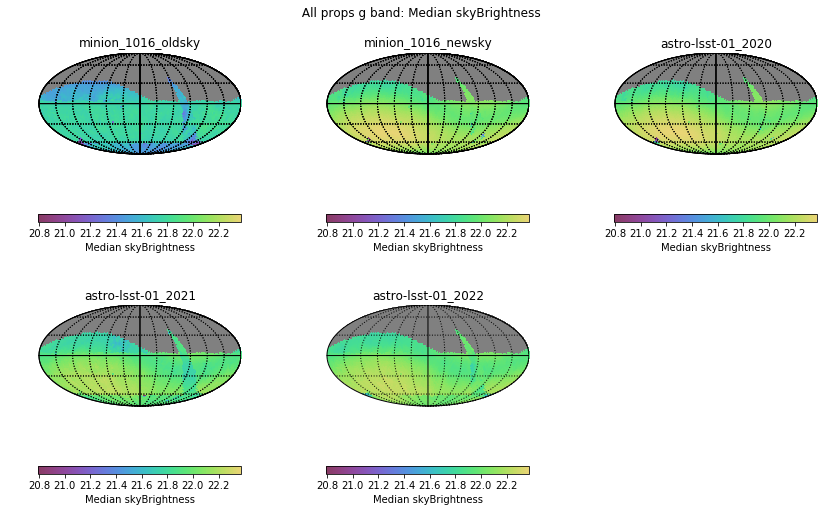

In [16]:
comp.plotMetricData(skybright, plotFunc=plots.HealpixSkyMap(), userPlotDict={'figsize':(12, 7)})

/Users/lynnej/lsstsw2/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


{'SkyMap': 1}

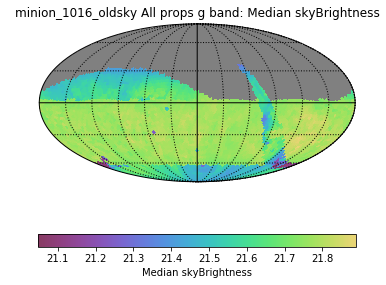

In [17]:
skybright['minion_1016_oldsky'].plot(plotFunc=plots.HealpixSkyMap())

/Users/lynnej/lsstsw2/miniconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


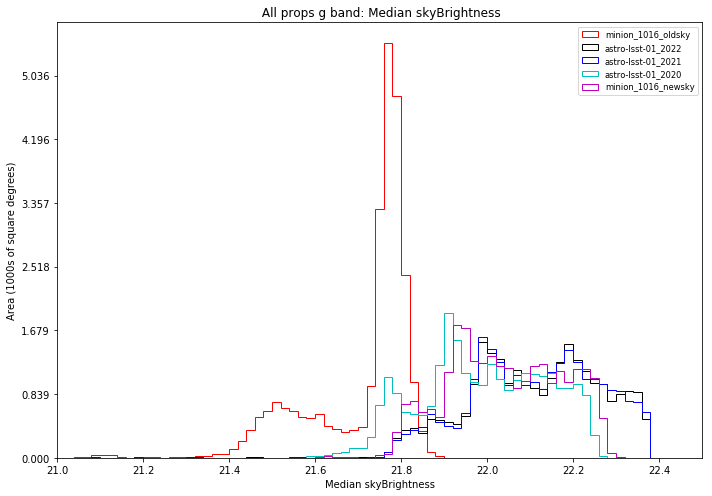

In [30]:
comp.plotMetricData(skybright, runlist=comp.runlist,
                    plotFunc=plots.HealpixHistogram(), userPlotDict={'figsize':(10, 7), 'binsize':.02, 
                                                                    'xMin': 21, 'xMax': 22.5})